In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_horse_dir = os.path.join('../data/train_datasets/horses')
train_human_dir = os.path.join('../data/train_datasets/humans')

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    '../data/train_datasets/',
    target_size=(300,300),
    batch_size=10,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-3),
              metrics=['accuracy'])

In [12]:
model.fit(train_generator, epochs=15, verbose=2)

Train for 103 steps
Epoch 1/15
103/103 - 36s - loss: 0.4876 - accuracy: 0.8150
Epoch 2/15
103/103 - 34s - loss: 0.2329 - accuracy: 0.9338
Epoch 3/15
103/103 - 34s - loss: 0.1187 - accuracy: 0.9718
Epoch 4/15
103/103 - 34s - loss: 0.1718 - accuracy: 0.9757
Epoch 5/15
103/103 - 34s - loss: 0.1212 - accuracy: 0.9825
Epoch 6/15
103/103 - 35s - loss: 0.0942 - accuracy: 0.9893
Epoch 7/15
103/103 - 35s - loss: 3.4937e-04 - accuracy: 1.0000
Epoch 8/15
103/103 - 36s - loss: 0.1305 - accuracy: 0.9893
Epoch 9/15
103/103 - 35s - loss: 0.0799 - accuracy: 0.9912
Epoch 10/15
103/103 - 35s - loss: 4.6418e-04 - accuracy: 1.0000
Epoch 11/15
103/103 - 34s - loss: 8.5579e-07 - accuracy: 1.0000
Epoch 12/15
103/103 - 34s - loss: 0.4102 - accuracy: 0.9844
Epoch 13/15
103/103 - 35s - loss: 5.0244e-05 - accuracy: 1.0000
Epoch 14/15
103/103 - 34s - loss: 3.5413e-07 - accuracy: 1.0000
Epoch 15/15
103/103 - 34s - loss: 6.9419e-10 - accuracy: 1.0000


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

outputs = [layer.output for layer in model.layers]

visualization_model = tf.keras.models.Model(inputs = model.input,
                                             outputs = outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in os.listdir(train_horse_dir)]
human_img_files = [os.path.join(train_human_dir, f) for f in os.listdir(train_human_dir)]

img_path = random.choice(horse_img_files + human_img_files)

image = load_img(img_path, target_size=(300,300))

In [41]:
img_path

'../data/train_datasets/humans\\human07-30.png'

In [59]:
x = img_to_array(image)
x = np.expand_dims(x, axis=0)
x = x / 255.0

In [60]:
successive_outputs = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


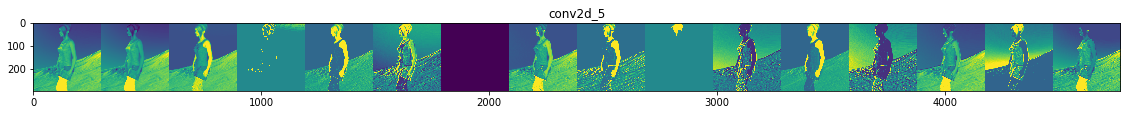

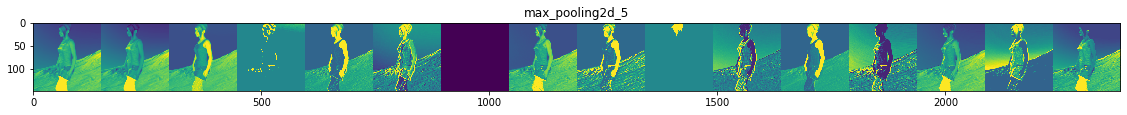

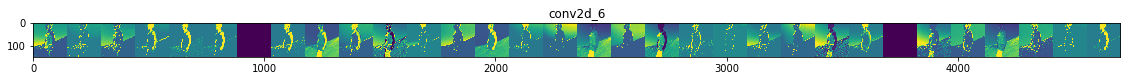

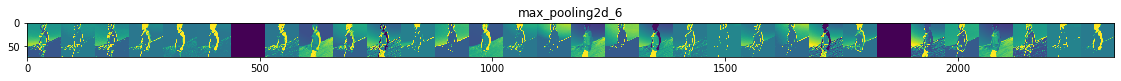

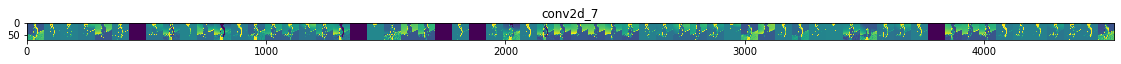

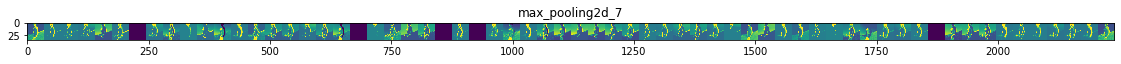

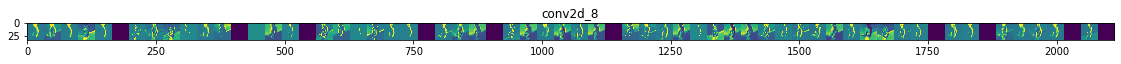

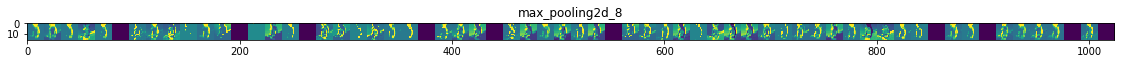

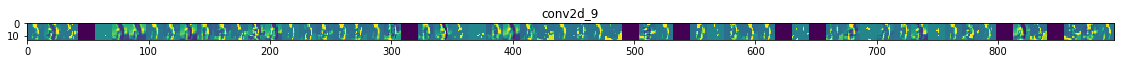

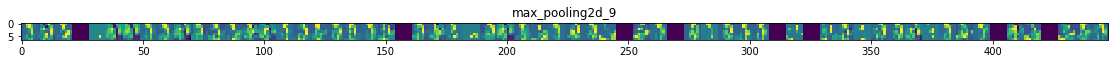

In [62]:
for layer_name, feature_map in zip(layer_names, successive_outputs):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0, 255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
        scale = 20./n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid)